In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [2]:
df = pd.read_csv("../../assets/huggingface_with_fairness.csv")

In [3]:
features = ['performance_score', 'co2_eq_emissions']
df_cluster = df[features].dropna() # Usar .dropna() para eliminar filas con datos faltantes


In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

In [5]:
df_scaled = pd.DataFrame(df_scaled, columns=features)


In [6]:
print("Datos listos para el análisis. Muestra de datos estandarizados:")
print(df_scaled.head())

Datos listos para el análisis. Muestra de datos estandarizados:
   performance_score  co2_eq_emissions
0          -0.789916          0.187796
1          -0.462499          0.167987
2           0.853967         -0.183123
3           0.739159         -0.043359
4           0.183730          0.160676


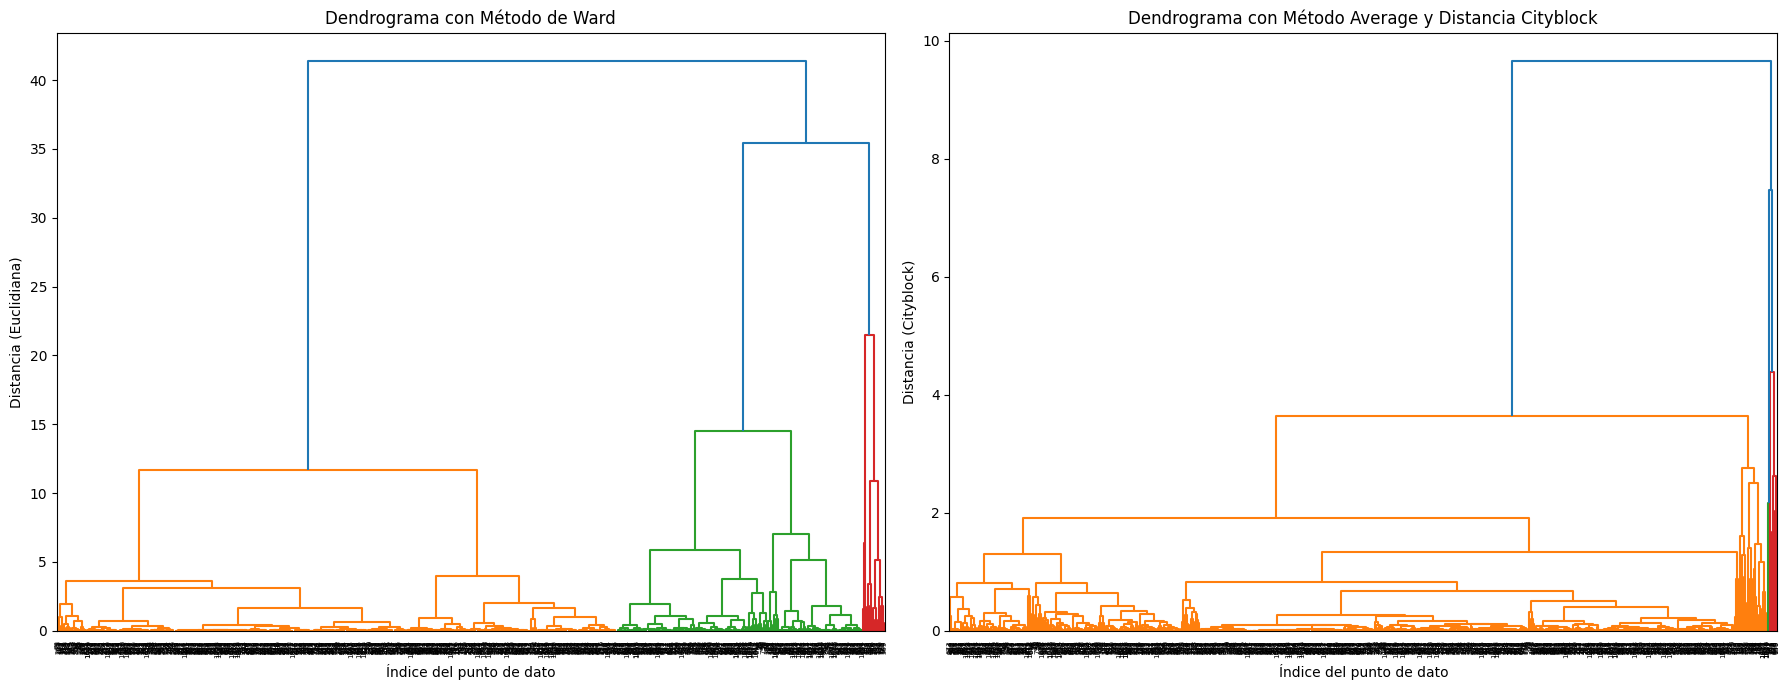

In [7]:
# Crear una figura para comparar los dos dendrogramas
plt.figure(figsize=(18, 7))

# --- Dendrograma 1: Método de Ward (con distancia Euclidiana implícita) ---
plt.subplot(1, 2, 1)
plt.title("Dendrograma con Método de Ward")
plt.xlabel("Índice del punto de dato")
plt.ylabel("Distancia (Euclidiana)")
# 'linkage' es la función clave que realiza el clustering
linked_ward = linkage(df_scaled, method='ward', metric='euclidean')
dendrogram(linked_ward)

# --- Dendrograma 2: Método Average con Distancia Cityblock (Manhattan) ---
plt.subplot(1, 2, 2)
plt.title("Dendrograma con Método Average y Distancia Cityblock")
plt.xlabel("Índice del punto de dato")
plt.ylabel("Distancia (Cityblock)")
linked_avg = linkage(df_scaled, method='average', metric='cityblock')
dendrogram(linked_avg)

plt.tight_layout()
plt.show()

In [8]:
from scipy.cluster.hierarchy import fcluster

# Vamos a usar el resultado del método de Ward, que es más común
num_clusters = 3
clusters = fcluster(linked_ward, num_clusters, criterion='maxclust')

# Añadir la asignación de clústeres de nuevo al DataFrame original (no el escalado)
df_cluster['cluster'] = clusters

print("\nConteo de modelos en cada clúster:")
print(df_cluster['cluster'].value_counts())


Conteo de modelos en cada clúster:
cluster
1    715
2    315
3     28
Name: count, dtype: int64



--- Resumen de Características por Clúster ---
         performance_score  co2_eq_emissions
cluster                                     
1                 0.892171         14.625881
3                 0.447959       1713.254750
2                 0.381745         48.676163


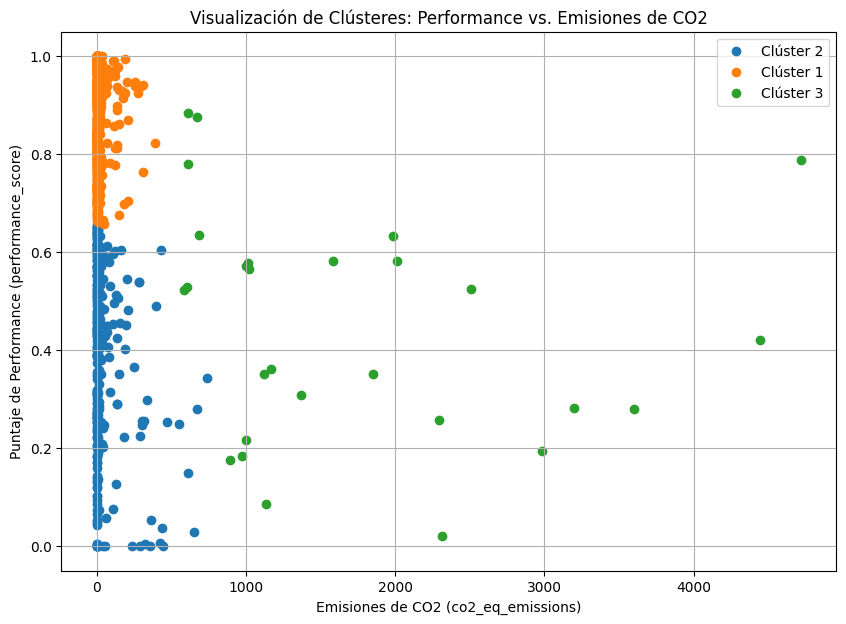

In [9]:
# Agrupar por la nueva columna 'cluster' y calcular la media de las características
cluster_summary = df_cluster.groupby('cluster')[features].mean().sort_values(by='performance_score', ascending=False)

print("\n--- Resumen de Características por Clúster ---")
print(cluster_summary)

# Visualización de los clústeres con un scatter plot
plt.figure(figsize=(10, 7))
for cluster_id in df_cluster['cluster'].unique():
    subset = df_cluster[df_cluster['cluster'] == cluster_id]
    plt.scatter(subset['co2_eq_emissions'], subset['performance_score'], label=f'Clúster {cluster_id}')

plt.title('Visualización de Clústeres: Performance vs. Emisiones de CO2')
plt.xlabel('Emisiones de CO2 (co2_eq_emissions)')
plt.ylabel('Puntaje de Performance (performance_score)')
plt.legend()
plt.grid(True)
plt.show()